# Highway Env testing

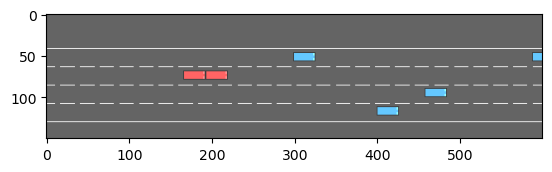

: 

In [6]:
import gymnasium
import highway_env
from matplotlib import pyplot as plt
%matplotlib inline

env = gymnasium.make('highway-v0', render_mode='rgb_array')
env.reset()
for _ in range(30):
    action = env.unwrapped.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()

crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashTrue
overFalse
crashTrue
overFalse
crashTrue
overFalse
crashTrue
overFalse


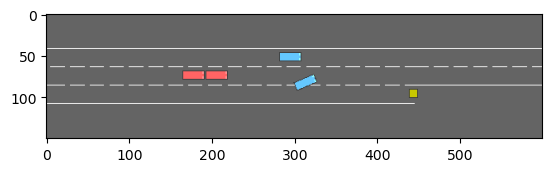

In [2]:
env = gymnasium.make("merge-v0", render_mode='rgb_array')
env.reset()

for _ in range(10):
    action = env.unwrapped.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()

/home/zearaujo11/anaconda3/lib/python3.10/site-packages/gymnasium/envs/registration.py:518: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


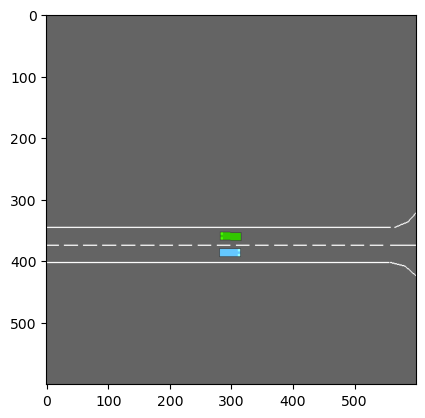

In [3]:
env = gymnasium.make("intersection-v0", render_mode='rgb_array')
env.reset()

for _ in range(10):
    action = env.unwrapped.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()

## Testing RL (Reinforcement Learning models)

In [4]:
!pip install stable-baselines3

from stable_baselines3 import DQN


""" env = gymnasium.make(
    "highway-v0",
    render_mode='rgb_array',
    config={
        "lanes_count": 4,
        "reward_speed_range": [20, 30],  # Defines a range for rewarding the vehicle based on speed.
        "collision_reward": -1,          # Defines a penalty for collisions.
        "high_speed_reward": 0.4,        # Defines a reward for driving at a high speed safely.
    }
) """


env = gymnasium.make("highway-v0", render_mode='rgb_array', config={"lanes_count": 4})
model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,   
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(2e4))
model.save("highway_dqn/model")

model = DQN.load("highway_dqn/model")
while True:
  done = truncated = False
  obs, info = env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()

  Using cached stable_baselines3-2.3.2-py3-none-any.whl (182 kB)
     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 409.9/797.1 MB 15.3 MB/s eta 0:00:26ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device

     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 410.4/797.1 MB 15.3 MB/s eta 0:00:26


ModuleNotFoundError: No module named 'stable_baselines3'